In [1]:
#Needed AND also using JD code
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import json
import csv
import os
FRvideos = "../resources/FRvideos.csv"

In [2]:

FR_df = pd.read_csv(FRvideos)
FR_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...


In [4]:
# reading the json file
file = open("../resources/FR_category_id.json")
FRjson = json.load(file)

In [5]:
# looping through the json file and replacing the category id with the category name
length = len(FRjson["items"])
length



31

In [6]:
FR_df["category_id"] = FR_df["category_id"].astype(str)

for x in range(length):
    id_number = FRjson["items"][x]["id"]
    category_name = FRjson["items"][x]["snippet"]["title"]
    FR_df["category_id"] = FR_df["category_id"].replace({f"{id_number}": f"{category_name}"})
    
FR_df["category_id"] = FR_df["category_id"].replace({"29": "Nonprofits & Activism"})
    
FR_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,Entertainment,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,Entertainment,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,Comedy,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,Gaming,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,Sports,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...


In [8]:


# this shows how many videos of each category is present in the data
FR_count_df = pd.DataFrame(FR_df.groupby("category_id").count(), columns=["video_id"])
FR_count_df = FR_count_df.rename(columns={"video_id": "count"})
FR_count_df.sort_values(by=["count"], ascending=False)



,count
category_id,
Entertainment,9819
People & Blogs,5719
Comedy,4343
Sports,4342
Music,3946
News & Politics,3752
Howto & Style,2361
Film & Animation,2157
Gaming,1459


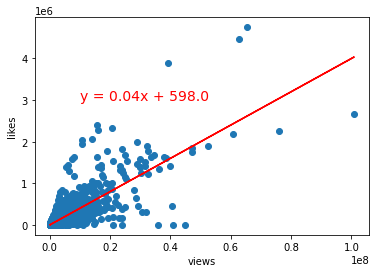

In [9]:
# separate dataframe using just the numerical value columns
# this is probably not too needed
FR_dateview_df = pd.DataFrame(FR_df, columns=["trending_date", "views", "likes", "dislikes", "comment_count"])


# views vs likes on all videos
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(FR_dateview_df["views"], FR_dateview_df["likes"])
regress_value = FR_dateview_df["views"] * slope + intercept
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 0)}"
plt.plot(FR_dateview_df["views"], regress_value, "r-")
plt.annotate(line_eq, (1e7, 3e6), fontsize=14, color="red")
plt.scatter(FR_dateview_df["views"], FR_dateview_df["likes"])
plt.xlabel("views")
plt.ylabel("likes")
plt.show()



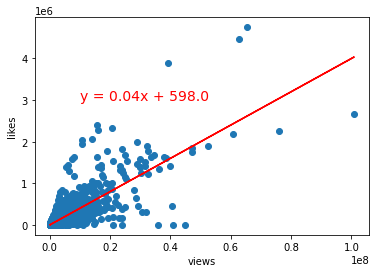

In [10]:
# views vs likes on all videos
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(FR_dateview_df["views"], FR_dateview_df["likes"])
regress_value = FR_dateview_df["views"] * slope + intercept
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 0)}"
plt.plot(FR_dateview_df["views"], regress_value, "r-")
plt.annotate(line_eq, (1e7, 3e6), fontsize=14, color="red")
plt.scatter(FR_dateview_df["views"], FR_dateview_df["likes"])
plt.xlabel("views")
plt.ylabel("likes")
plt.show()

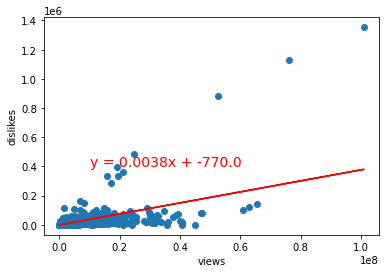

In [11]:


# views vs dislikes on all videos
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(FR_dateview_df["views"], FR_dateview_df["dislikes"])
regress_value = FR_dateview_df["views"] * slope + intercept
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 0)}"
plt.plot(FR_dateview_df["views"], regress_value, "r-")
plt.annotate(line_eq, (1e7, 4e5), fontsize=14, color="red")
plt.scatter(FR_dateview_df["views"], FR_dateview_df["dislikes"])
plt.xlabel("views")
plt.ylabel("dislikes")
plt.show()



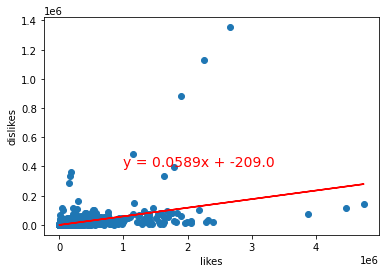

In [12]:
# likes vs dislikes on all videos
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(FR_dateview_df["likes"], FR_dateview_df["dislikes"])
regress_value = FR_dateview_df["likes"] * slope + intercept
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 0)}"
plt.plot(FR_dateview_df["likes"], regress_value, "r-")
plt.annotate(line_eq, (1e6, 4e5), fontsize=14, color="red")
plt.scatter(FR_dateview_df["likes"], FR_dateview_df["dislikes"])
plt.xlabel("likes")
plt.ylabel("dislikes")
plt.show()

In [13]:
group_by_category = FR_df.groupby('category_id')
#likes per category
likes_count = group_by_category['likes'].sum()
likes_count



category_id
Autos & Vehicles           1606767
Comedy                   130805444
Education                  8302644
Entertainment            118243560
Film & Animation          24631422
Gaming                    22502704
Howto & Style             15519633
Movies                       24295
Music                    277314234
News & Politics            9301486
Nonprofits & Activism      5987384
People & Blogs            28927705
Pets & Animals             1335449
Science & Technology      18513625
Shows                       291212
Sports                    43964560
Trailers                       192
Travel & Events             871774
Name: likes, dtype: int64

In [14]:
#dislikes per category
dislikes_count = group_by_category['dislikes'].sum()
dislikes_count

category_id
Autos & Vehicles            52260
Comedy                    3391288
Education                  201359
Entertainment            10351578
Film & Animation          1092744
Gaming                    1097458
Howto & Style              643543
Movies                       1048
Music                     9772318
News & Politics            775868
Nonprofits & Activism     1231113
People & Blogs            1760711
Pets & Animals              44591
Science & Technology       511858
Shows                      103846
Sports                    2145956
Trailers                        9
Travel & Events             10980
Name: dislikes, dtype: int64

In [15]:
#number of videos trending per category
trending_count = group_by_category['views'].count()
trending_count


#comments per category
comment_count = group_by_category['comment_count'].sum()
comment_count



category_id
Autos & Vehicles           207973
Comedy                    9136814
Education                  768074
Entertainment            15729924
Film & Animation          2841655
Gaming                    3047593
Howto & Style             1759358
Movies                       1467
Music                    25446289
News & Politics           1896101
Nonprofits & Activism     1848593
People & Blogs            4104818
Pets & Animals             187590
Science & Technology      2926363
Shows                       44882
Sports                    4575418
Trailers                        0
Travel & Events            101892
Name: comment_count, dtype: int64

In [16]:
views_likes_dislikes = pd.DataFrame({'Trending': trending_count,
    'Likes': likes_count, 
    'Dislikes': dislikes_count,
    'Comments': comment_count})
views_likes_dislikes
vlk_sorted = views_likes_dislikes.sort_values(by=["Trending"], ascending=False)
vlk_sorted

,Trending,Likes,Dislikes,Comments
category_id,,,,
Entertainment,9819,118243560,10351578,15729924
People & Blogs,5719,28927705,1760711,4104818
Comedy,4343,130805444,3391288,9136814
Sports,4342,43964560,2145956,4575418
Music,3946,277314234,9772318,25446289
News & Politics,3752,9301486,775868,1896101
Howto & Style,2361,15519633,643543,1759358
Film & Animation,2157,24631422,1092744,2841655
Gaming,1459,22502704,1097458,3047593


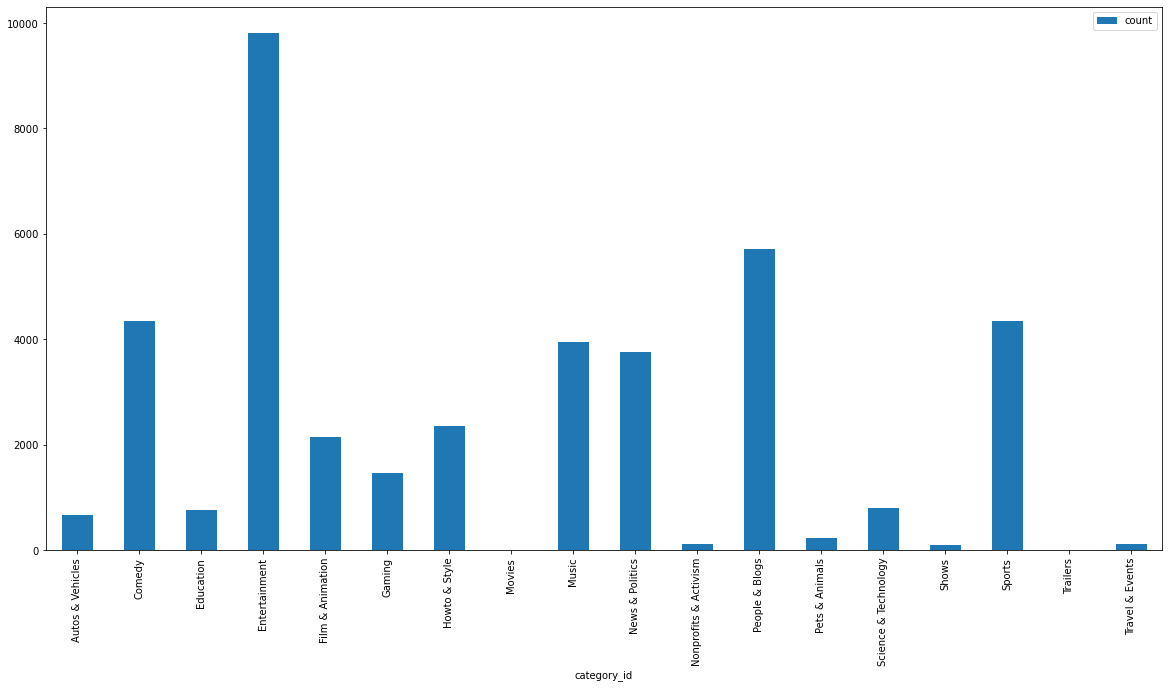

In [17]:
FR_count_df.plot(subplots=False,kind= "bar", figsize =(20,10))
plt.show()


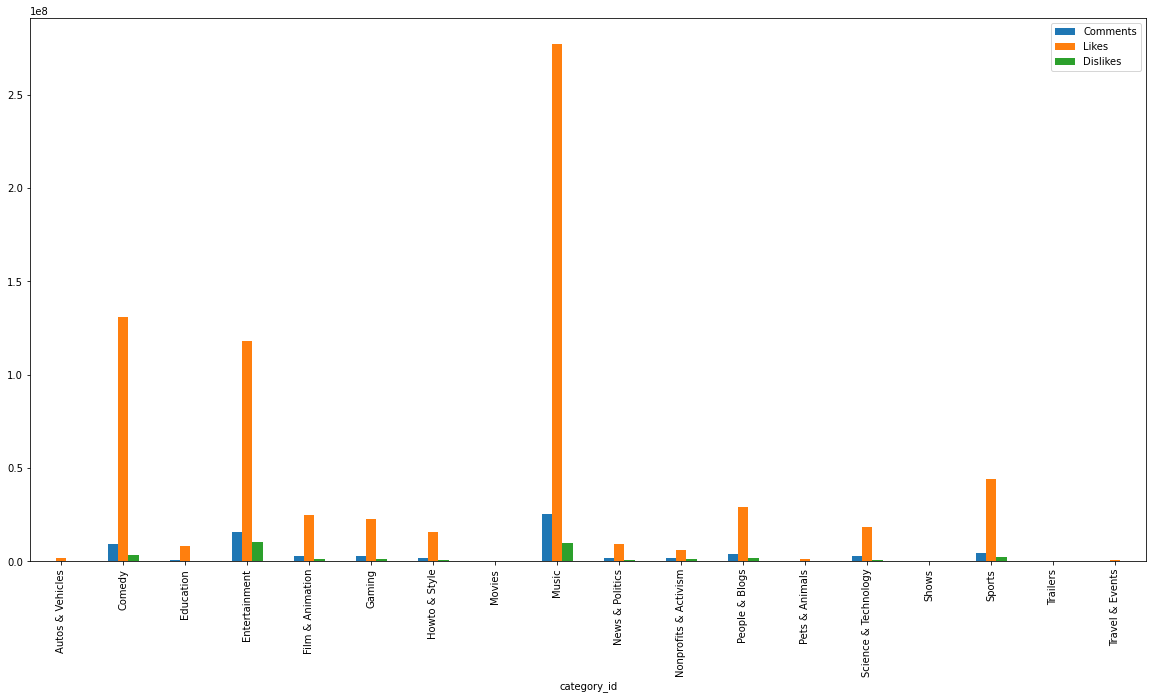

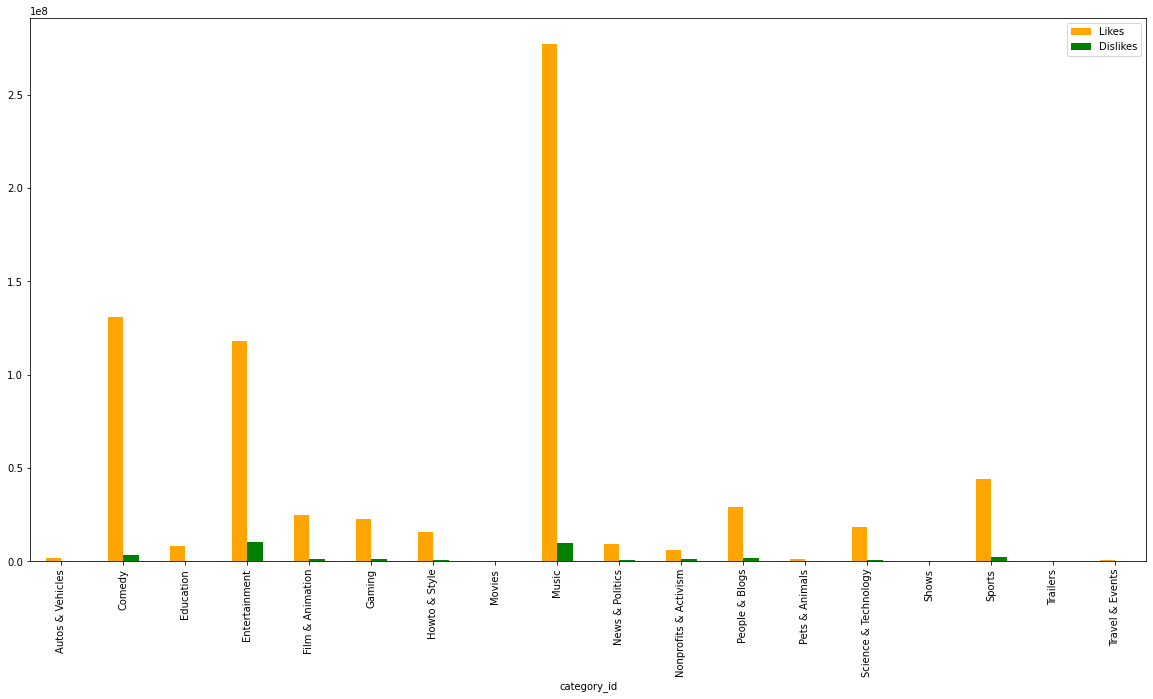

In [18]:
#grouping
groupAll_df= views_likes_dislikes[['Comments', 'Likes', 'Dislikes']].groupby('category_id').sum()
groupAll_df.plot(subplots=False,kind= "bar", figsize =(20,10))
plt.show()
group_df= views_likes_dislikes[['Likes', 'Dislikes']].groupby('category_id').sum()
group_df.plot(subplots=False,kind= "bar", figsize =(20,10), color =['orange', 'green'])
plt.show()

In [19]:


# shows how many videos on which category has the comments/ratings disabled, and video removed
FR_no_comment_df = FR_df.loc[FR_df["comments_disabled"] == True, :]
FR_no_rate_df = FR_df.loc[FR_df["ratings_disabled"] == True, :]
FR_no_video_df = FR_df.loc[FR_df["video_error_or_removed"] == True, :]

#FR_no_comment_df["category_id"].value_counts()
#FR_no_rate_df["category_id"].value_counts()
FR_no_video_df["category_id"].value_counts()



Film & Animation    7
Entertainment       5
News & Politics     3
Music               2
Gaming              1
Comedy              1
Pets & Animals      1
People & Blogs      1
Autos & Vehicles    1
Name: category_id, dtype: int64

In [20]:
FR_no_video_df.describe()

,views,likes,dislikes,comment_count
count,2.200000e+01,22.000000,22.000000,22.000000
mean,4.323743e+05,15900.272727,537.681818,1022.818182
std,7.549059e+05,32769.880742,1043.343727,2235.521727
min,6.771000e+03,0.000000,0.000000,9.000000
25%,4.305800e+04,365.750000,28.750000,33.000000
50%,1.490200e+05,1921.000000,90.500000,225.500000
75%,3.914615e+05,7596.250000,329.250000,639.500000
max,3.418472e+06,117998.000000,3751.000000,9757.000000


In [18]:


# shows which channel
FR_df["channel_title"].value_counts()



Troom Troom FR         195
Elhiwar Ettounsi       181
sam zirah              173
Lama Faché             171
Marodi TV Sénégal      169
                      ... 
Unravel                  1
Fabregas Métis Noir      1
SnS__7                   1
Madame Monsieur          1
Itsme Madd               1
Name: channel_title, Length: 6680, dtype: int64